In [1]:
# # -*- coding: utf-8 -*-

# %matplotlib notebook
# %load 汇报
#加载所需的模块
from sklearn import datasets
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(123)

#生成样本
# X,y= datasets.make_circles(n_samples = 2000, factor=0.3, noise=.2)
X,y = datasets.make_moons(n_samples=2000, noise=.1)
# X,y = datasets.make_gaussian_quantiles(n_classes=2,n_samples=2000)

#划分训练集和测试集
X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#最大最小标准化到0~255
ss = StandardScaler().fit(X)
X = ss.transform(X)/2
X_test = ss.transform(X_test)/2

#构建特征空间
c,r = np.mgrid[[slice(-1,1,0.02)]*2]
p = np.c_[c.flat,r.flat]

#可视化
fig = plt.figure(figsize = (9,3))
#自定义cmap
top = cm.get_cmap('Oranges_r', 512)
bottom = cm.get_cmap('Blues', 512)
newcolors = np.vstack((top(np.linspace(0.55, 1, 512)),
                       bottom(np.linspace(0, 0.75, 512))))
cm_bright = ListedColormap(newcolors, name='OrangeBlue')

plt.subplot(121)
m1 = plt.scatter(*X.T,c = y,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('train samples')
plt.axis('equal')
plt.subplot(122)
m2 = plt.scatter(*X_test.T,c = y_test,cmap = cm_bright,edgecolors='white',s = 20,linewidths = 0.5)
plt.title('test samples')
plt.axis('equal')
ax = fig.get_axes()
plt.colorbar(ax = ax)
plt.show()

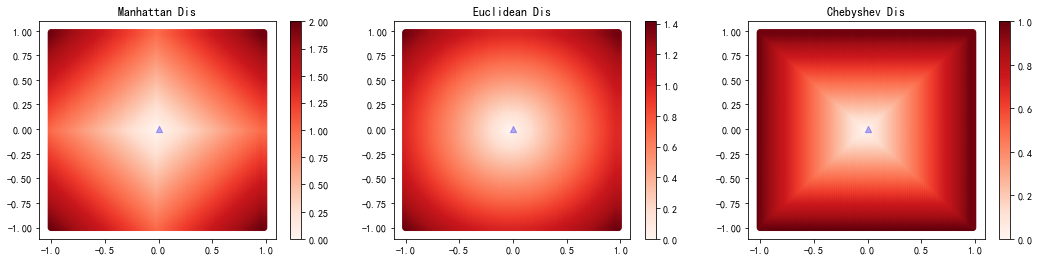

In [2]:
def gaussian(data,u=0,sigma=1):
    return np.exp(-(data-u)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)
def kde(data,field=1):
    return (3/np.pi)*field*(1-(data)**2)**2
# 任选一个初始点
origin_p = np.array([[0,0]])
dis_temp = p-origin_p
# 分别计算特征空间各点到初始点的距离
manha_dis = np.linalg.norm(dis_temp,ord=1,axis=1)
eu_dis = np.linalg.norm(dis_temp,ord=2,axis=1)
cheb_dis = np.linalg.norm(dis_temp,ord=np.inf,axis=1)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
cm1 = ax1.scatter(*p.T,c=manha_dis,cmap='Reds')
ax1.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax1.set_title('Manhattan Dis')
cm2 = ax2.scatter(*p.T,c=eu_dis,cmap = 'Reds')
ax2.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax2.set_title('Euclidean Dis')
cm3 = ax3.scatter(*p.T,c=cheb_dis,cmap = 'Reds')
ax3.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax3.set_title('Chebyshev Dis')
plt.colorbar(cm1,ax=ax1)
plt.colorbar(cm2,ax=ax2)
plt.colorbar(cm3,ax=ax3)

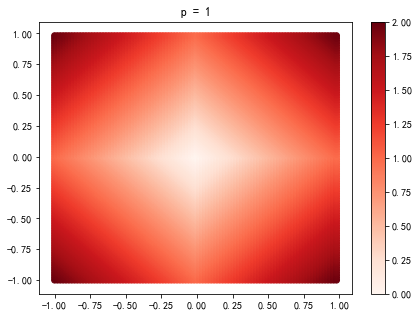

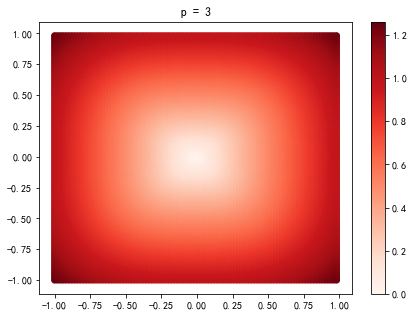

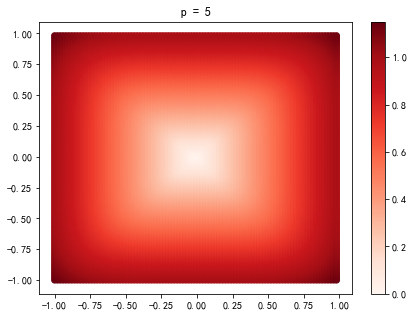

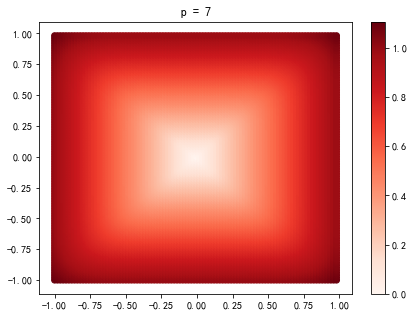

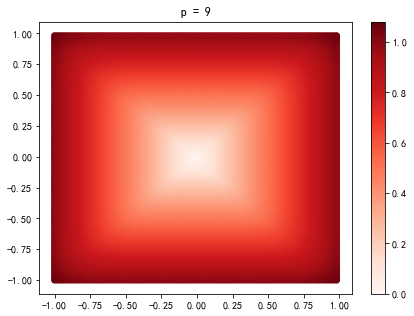

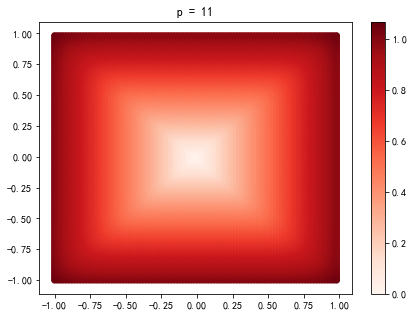

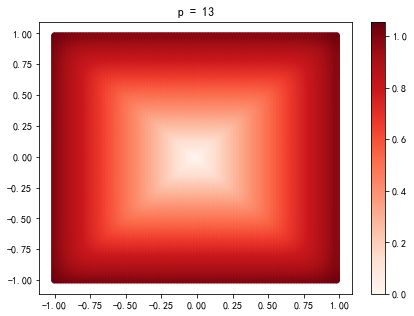

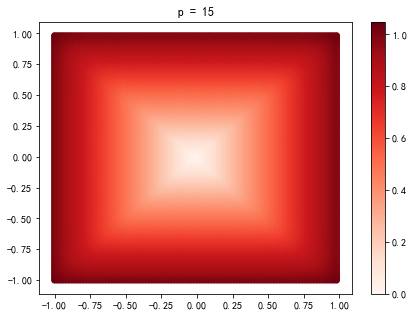

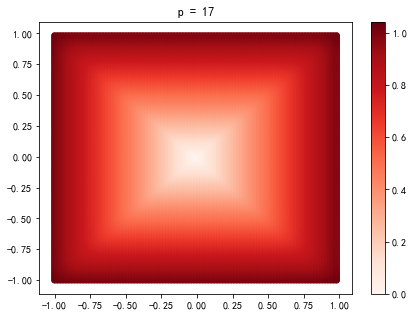

In [8]:
for i in range(1,19,2):
    fig = plt.figure(figsize = (7,5))
    dis = np.linalg.norm(dis_temp,ord=i,axis=1)
    scat = plt.scatter(*p.T,c=dis,cmap='Reds')
    plt.title('p = %d'%i)
    plt.colorbar(scat)
    plt.show()

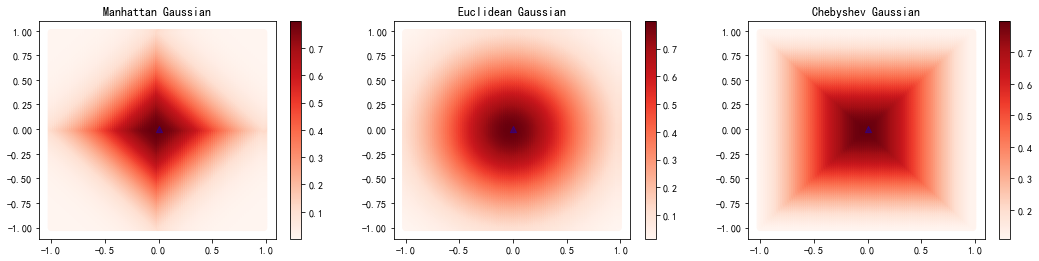

In [17]:
# 计算各点的标准正态分布概率
manha_Gauss = gaussian(manha_dis,0,0.5)
eu_Gauss = gaussian(eu_dis,0,0.5)
cheb_Gauss = gaussian(cheb_dis,0,0.5)
# 可视化
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
cm1 = ax1.scatter(*p.T,c=manha_Gauss,cmap='Reds')
ax1.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax1.set_title('Manhattan Gaussian')
cm2 = ax2.scatter(*p.T,c=eu_Gauss,cmap = 'Reds')
ax2.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax2.set_title('Euclidean Gaussian')
cm3 = ax3.scatter(*p.T,c=cheb_Gauss,cmap = 'Reds')
ax3.scatter(origin_p[0,0],origin_p[0,1],s=40, alpha=0.3, marker='^',c='b')
ax3.set_title('Chebyshev Gaussian')
plt.colorbar(cm1,ax=ax1)
plt.colorbar(cm2,ax=ax2)
plt.colorbar(cm3,ax=ax3)

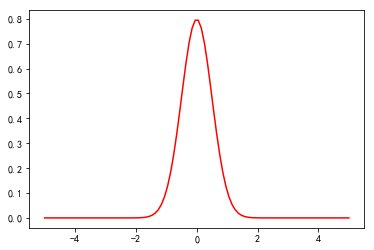

In [18]:
x_sample = np.linspace(-5,5,100)
y_sample = gaussian(x_sample,0,0.5)
plt.plot(x_sample,y_sample, 'r', label='m=0,sig=1')

In [41]:
def Distance_gaussian(origin_data,data_space,dis_type='eu',dis_return=False,mu=0,sigma=1):
    dis_tem = data_space-origin_data
    if dis_type == 'eu':
        ord=2
    elif dis_type == 'ma':
        ord=1
    elif dis_type =='ch':
        ord = np.inf
    else:
        print('Not finished')
        raise ValueError
    dis = np.linalg.norm(dis_tem,ord=ord,axis=1)
    if dis_return:
        return dis
    else:
        return gaussian(dis,mu,sigma)

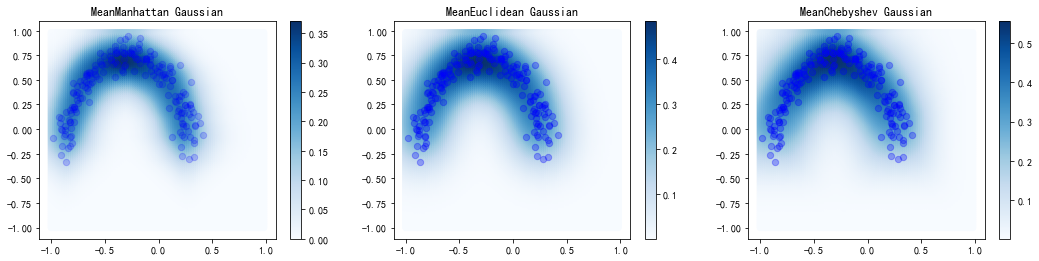

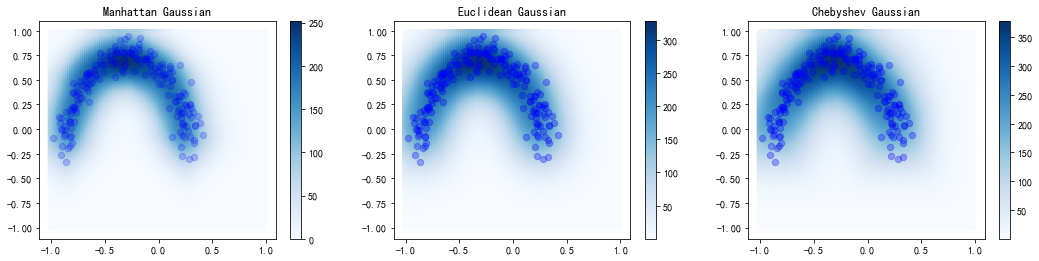

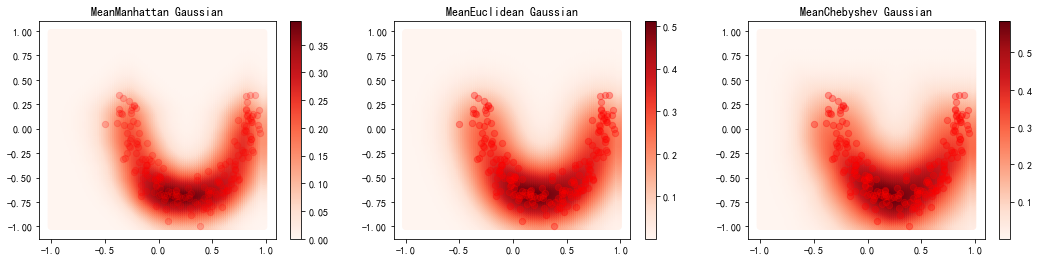

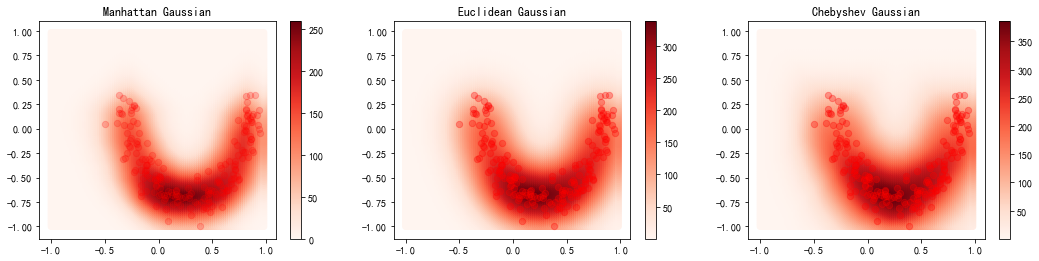

In [36]:
# 绘制多个点对特征空间的影响
def draw_X_gaussian(X,cmap='Oranges',Normlization = False,dis_return=False):
    p_F_eu = []
    p_F_ma = []
    p_F_ch = []
    for i in range(X.shape[0]):
        p_F_eu.append(Distance_gaussian(X[i,:],p,'eu',dis_return=dis_return))
        p_F_ch.append(Distance_gaussian(X[i,:],p,'ch',dis_return=dis_return))
        p_F_ma.append(Distance_gaussian(X[i,:],p,'ma',dis_return=dis_return))
    if Normlization:
        p_F_eu_sum = np.array(p_F_eu).mean(axis=0)
        p_F_ch_sum = np.array(p_F_ch).mean(axis=0)
        p_F_ma_sum = np.array(p_F_ma).mean(axis=0)
    else:
        p_F_eu_sum = np.array(p_F_eu).sum(axis=0)
        p_F_ch_sum = np.array(p_F_ch).sum(axis=0)
        p_F_ma_sum = np.array(p_F_ma).sum(axis=0)
    if cmap=='Reds':
        c_p = 'r'
    else:
        c_p = 'b'
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    cm1 = ax1.scatter(*p.T,c=p_F_ma_sum,cmap=cmap)
    ax1.scatter(*X[:200].T,s=40, alpha=0.2, marker='o',c=c_p)
    cm2 = ax2.scatter(*p.T,c=p_F_eu_sum,cmap =cmap)
    ax2.scatter(*X[:200].T,s=40, alpha=0.3, marker='o',c=c_p)
    cm3 = ax3.scatter(*p.T,c=p_F_ch_sum,cmap =cmap)
    ax3.scatter(*X[:200].T,s=40, alpha=0.3, marker='o',c=c_p)
    if Normlization:
        t_t = 'Mean'
    else:
        t_t = ''
    if dis_return:
        ax1.set_title(t_t+'Manhattan Dis')
        ax2.set_title(t_t+'Euclidean Dis')
        ax3.set_title(t_t+'Chebyshev Dis')
    else:
        ax1.set_title(t_t+'Manhattan Gaussian')
        ax2.set_title(t_t+'Euclidean Gaussian')
        ax3.set_title(t_t+'Chebyshev Gaussian')
    plt.colorbar(cm1,ax=ax1)
    plt.colorbar(cm2,ax=ax2)
    plt.colorbar(cm3,ax=ax3)
    return p_F_ma_sum,p_F_eu_sum,p_F_ch_sum
F_ind = np.where(y==0)
X_F = X[F_ind]
y_F = y[F_ind]
T_ind = np.where(y==1)
X_T = X[T_ind]
y_T = y[T_ind]

# 划分分类边界
# draw_X_gaussian(X_F,cmap='Blues',dis_return=True)
X_F_ma_mean,X_F_eu_mean,X_F_ch_mean = draw_X_gaussian(X_F,cmap='Blues',Normlization=True)
X_F_ma,X_F_eu,X_F_ch = draw_X_gaussian(X_F,cmap='Blues')
# draw_X_gaussian(X_T,cmap='Reds',dis_return=True)
X_T_ma_mean,X_T_eu_mean,X_T_ch_mean = draw_X_gaussian(X_T,cmap='Reds',Normlization=True)
X_T_ma,X_T_eu,X_T_ch =draw_X_gaussian(X_T,cmap='Reds')

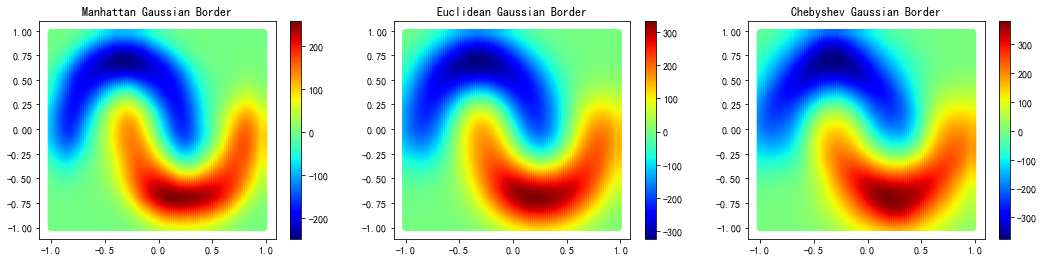

In [37]:
def draw_border(X_ma,X_eu,X_ch,title=''):
    X_ma_P = X_ma[0] - X_ma[1]
    X_eu_P = X_eu[0] - X_eu[1]
    X_ch_P = X_ch[0] - X_ch[1]
    X_ma_border = np.where(X_ma_P==0)
    X_eu_border = np.where(X_eu_P==0)
    X_ch_border = np.where(X_ch_P==0)

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18,4))
    cm1 = ax1.scatter(*p.T,c=X_ma_P,cmap='jet')
    ax1.scatter(*p[X_ma_border].T,c='k')
    ax1.set_title(title+'Manhattan Gaussian Border')
    cm2 = ax2.scatter(*p.T,c=X_eu_P,cmap ='jet')
    ax2.scatter(*p[X_eu_border].T,c='k')
    ax2.set_title(title+'Euclidean Gaussian Border')
    cm3 = ax3.scatter(*p.T,c=X_ch_P,cmap ='jet')
    ax3.scatter(*p[X_ch_border].T,c='k')
    ax3.set_title(title+'Chebyshev Gaussian Border')
    cbar = plt.colorbar(cm1,ax=ax1)
    plt.colorbar(cm2,ax=ax2)
    plt.colorbar(cm3,ax=ax3)
draw_border([X_T_ma,X_F_ma],[X_T_eu,X_F_eu],[X_T_ch,X_F_ch])
# draw_border([X_T_ma_mean,X_F_ma_mean],[X_T_eu_mean,X_F_eu_mean],[X_T_ch_mean,X_F_ch_mean],title='Norm ')

In [38]:
# 保存点到txt中
def write2txt(data,txt_name,value=1):
    with open(txt_name,'w') as f:
        f.write('x,y,value\n')
        for i in range(len(data)):
            line = [str(s) for s in np.append(data[i,:],value)]
            line = ','.join(line)+'\n'
            f.write(line)
write2txt(X_T,'X_T.txt',1)
write2txt(X_F,'X_F.txt',0)

In [39]:
p2X = []
for i in range(len(p)):
    eu_dis = Distance_gaussian(p[i,:],X,'eu',dis_return=True)
    ma_dis = Distance_gaussian(p[i,:],X,'ma',dis_return=True)
    ch_dis = Distance_gaussian(p[i,:],X,'ch',dis_return=True)
    p2X.append([ma_dis,eu_dis,ch_dis])
p2X = np.array(p2X)
sort_id = np.argsort(p2X,axis=-1)

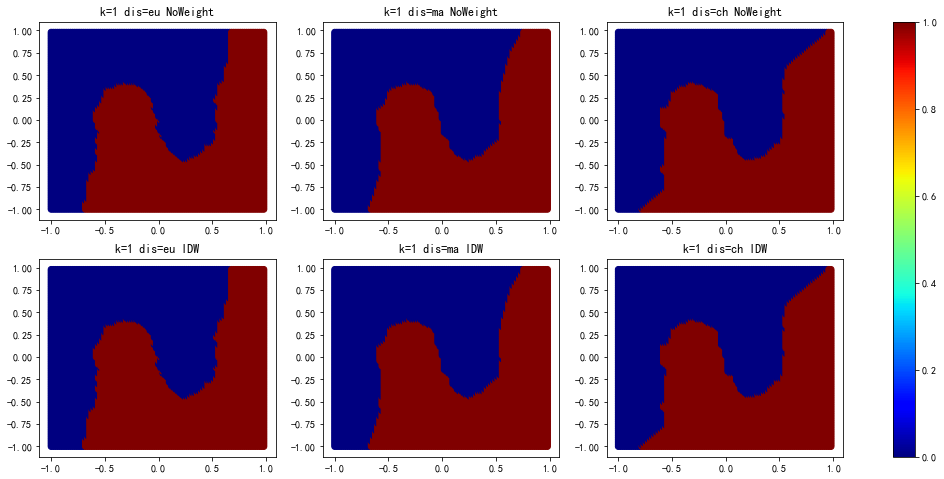

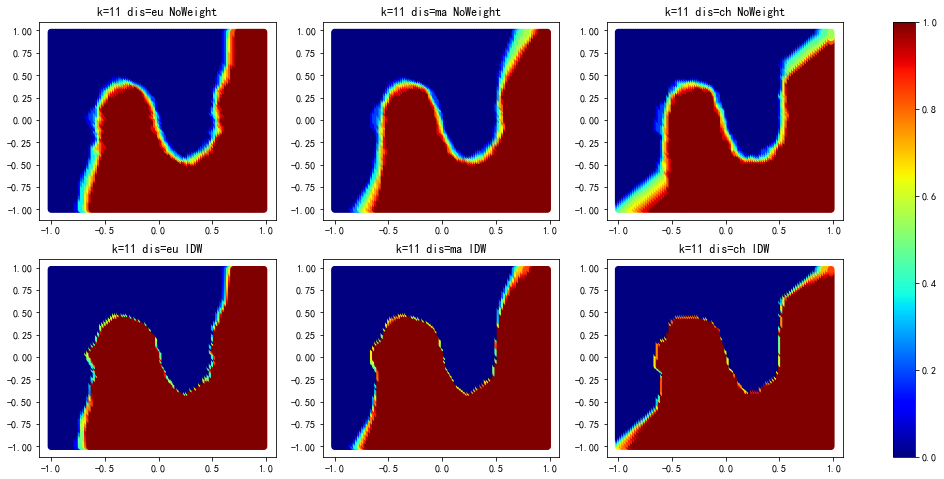

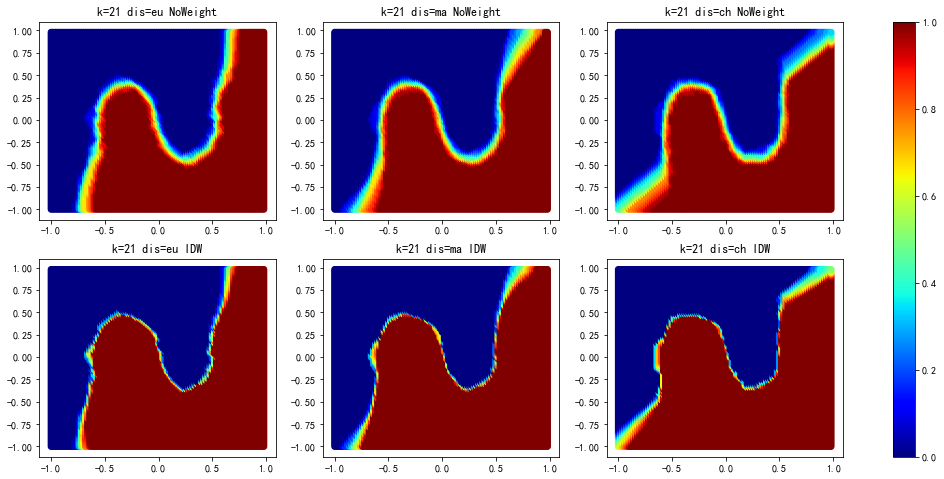

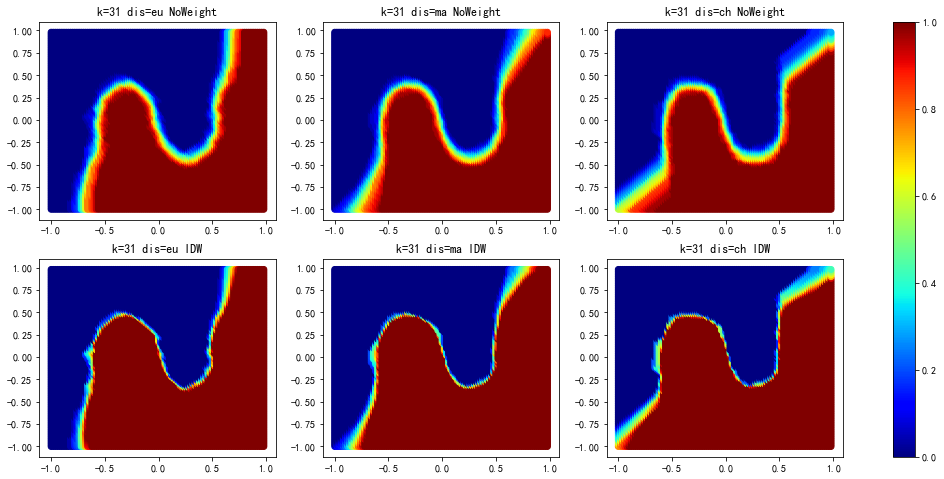

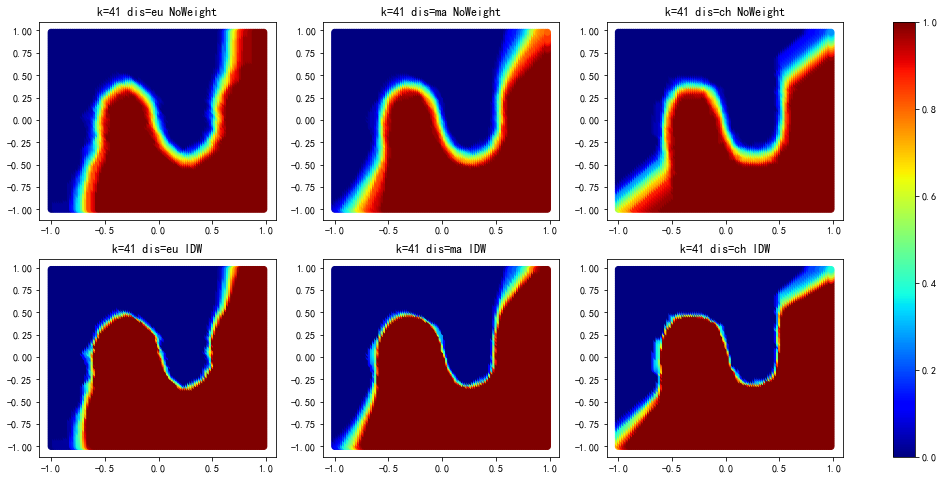

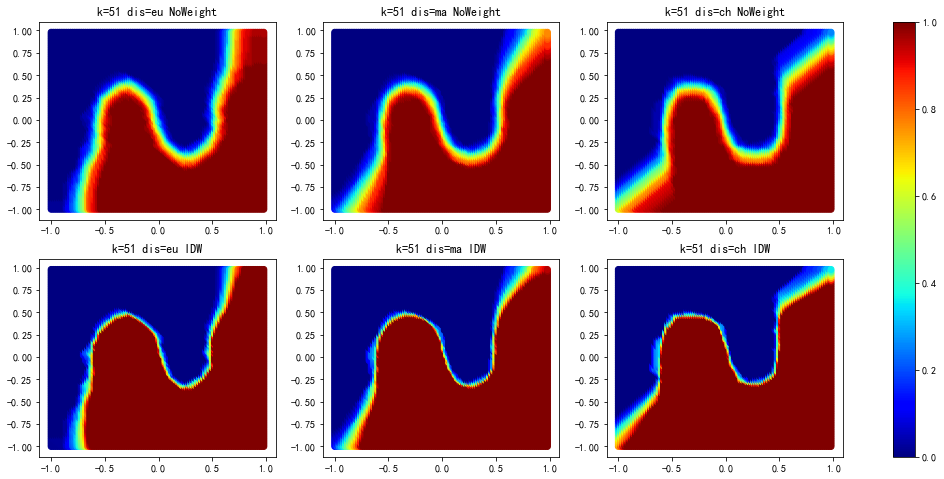

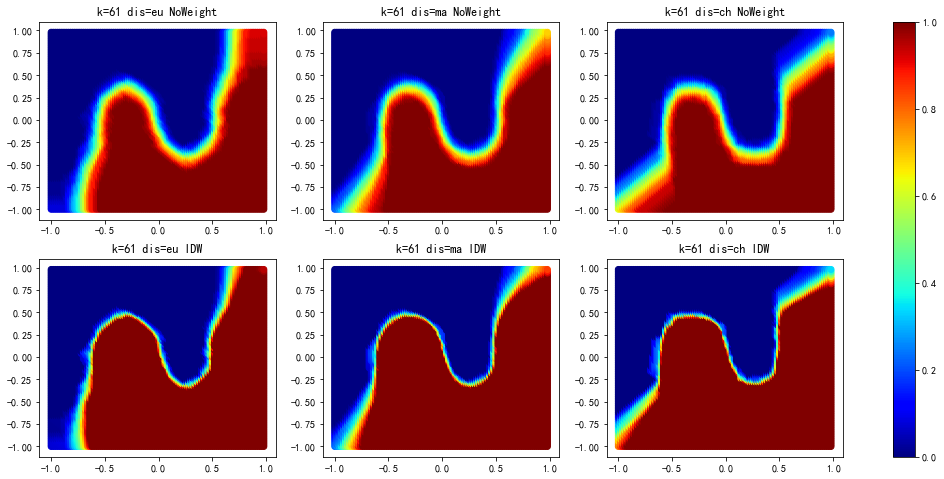

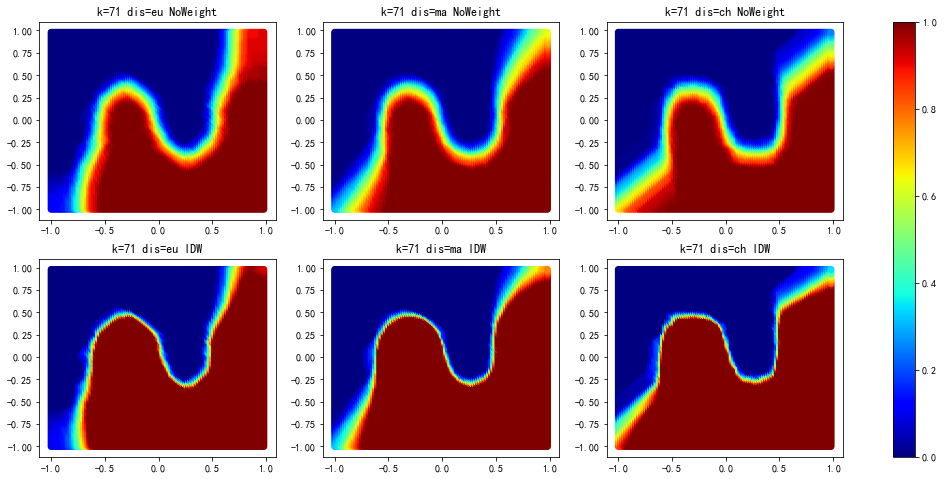

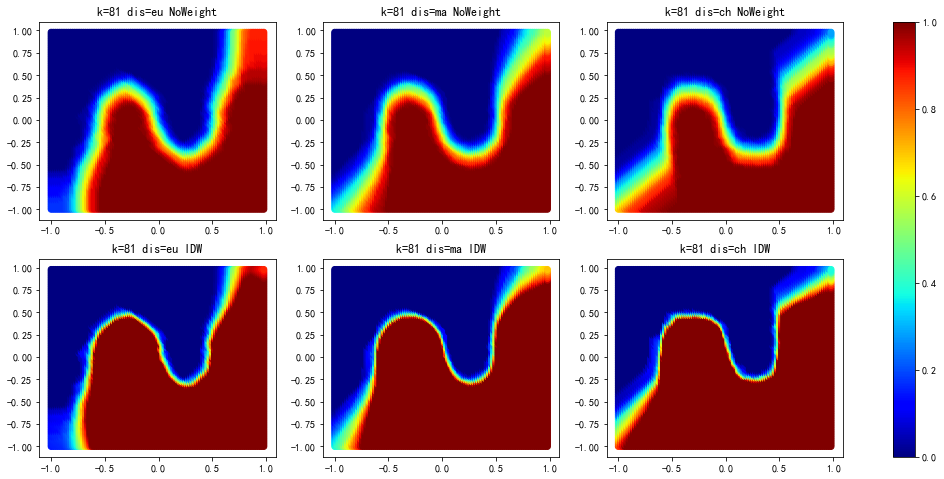

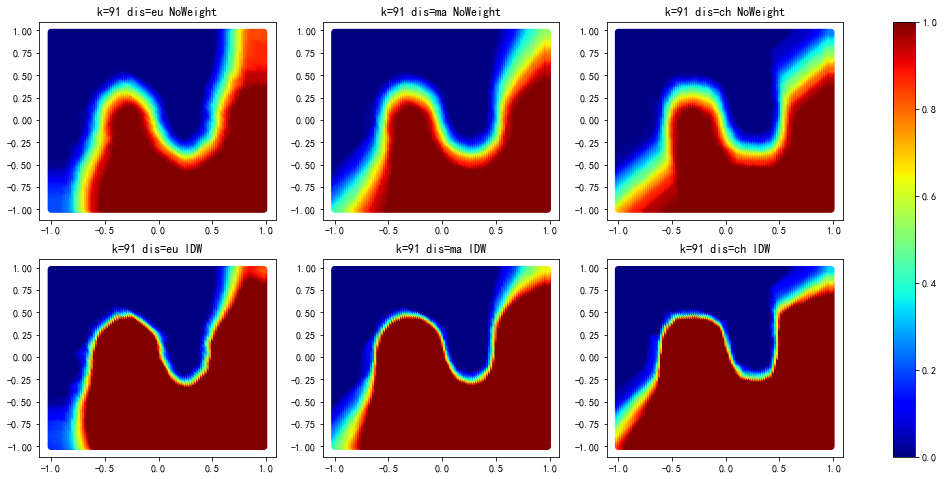

In [42]:
def draw_k(sord_id,p2X,k=1):
    fig,ax = plt.subplots(2,3,figsize=(18,8))
    dis_type = ['eu','ma','ch']
    for i in range(3):
        p_ind = sort_id[:,i,0:k]
        p_val = []
        p_dis = []
        for j in range(len(p)):
            p_val.append(y[p_ind[j,:]])
            p_dis.append(p2X[j,i,p_ind[j,:]])
        p_dis_weight = (np.array(p_val)*(1/np.array(p_dis))).sum(axis=-1)/k
        p_val = np.array(p_val).sum(axis=-1)/k
        ax[0,i].scatter(*p.T,c=p_val,cmap='jet',vmin=0,vmax=1)
        ax[0,i].set_title('k=%d dis=%s NoWeight'%(k,dis_type[i]))
        cm=ax[1,i].scatter(*p.T,c=p_dis_weight,cmap='jet',vmin=0,vmax=1)
        ax[1,i].set_title('k=%d dis=%s IDW'%(k,dis_type[i]))
    plt.colorbar(cm,ax=ax)
    return (p_val,p_dis_weight)
for k in range(1,101,10):
    draw_k(sort_id,p2X,k=k)    

In [43]:
#加入高光谱的空间内插
import scipy.io as sio
import sklearn
import os

data_name = 'IndianP'

if data_name == 'PaviaU':
    file_path = os.path.join(os.getcwd(), "HSI_Dataset", "PaviaU.mat")
    gnd_path = os.path.join(os.getcwd(), "HSI_Dataset", "PaviaU_gt.mat")
    img_name = "paviaU"
    gnd_name = "paviaU_gt"
    colorize = np.array([[0, 0, 255], [76, 230, 0],
                             [255, 190, 232], [255, 0, 0],
                             [156, 156, 156], [255, 255, 115],
                             [0, 255, 197], [132, 0, 168],
                             [0, 0, 0]], 'uint8')
elif data_name == 'IndianP':
    file_path = os.path.join(os.getcwd(), "HSI_Dataset", "Indian_pines_corrected.mat")
    gnd_path = os.path.join(os.getcwd(), "HSI_Dataset","Indian_pines_gt.mat")
    img_name = 'indian_pines_corrected'
    gnd_name = 'indian_pines_gt'
    colorize = np.array([[0,168,132],[76,0,115],[0,0,0],[190,255,232],
                       [250,0,0],[115,0,0],[205,205,102],[137,90,68],
                       [215,158,158],[255,115,223],[0,0,255],[156,156,156],
                       [115,223,255],[0,255,0],[255,255,0],[255,170,0]],'uint8')
    
img = (sio.loadmat(file_path))[img_name].astype(np.float32)
gnd = (sio.loadmat(gnd_path))[gnd_name].astype(np.int32)

feature = np.reshape(img,(img.shape[0]*img.shape[1],-1))
feature = sklearn.preprocessing.MinMaxScaler().fit_transform(feature)
label = np.reshape(gnd,(-1))
ind_no0 = np.where(label!=0)
feature_no0 = np.array(feature)[ind_no0]
label_no0 = np.array(label)[ind_no0]
train_feature = np.empty((0,feature.shape[-1]))
test_feature = np.empty((0,feature.shape[-1]))
train_label = []
test_label = []
class_num = (np.unique(label_no0)).shape[0]
for i in range(1,class_num+1):
    ind = np.where(label_no0==i)
    train_num = int(ind[0].shape[0]*0.1)
    train_feature=np.vstack((train_feature,feature_no0[ind[:train_num]]))
    test_feature=np.vstack((test_feature,feature_no0[ind[train_num:]]))
    train_label.extend(label_no0[ind[:train_num]])
    test_label.extend(label_no0[ind[train_num:]]) 

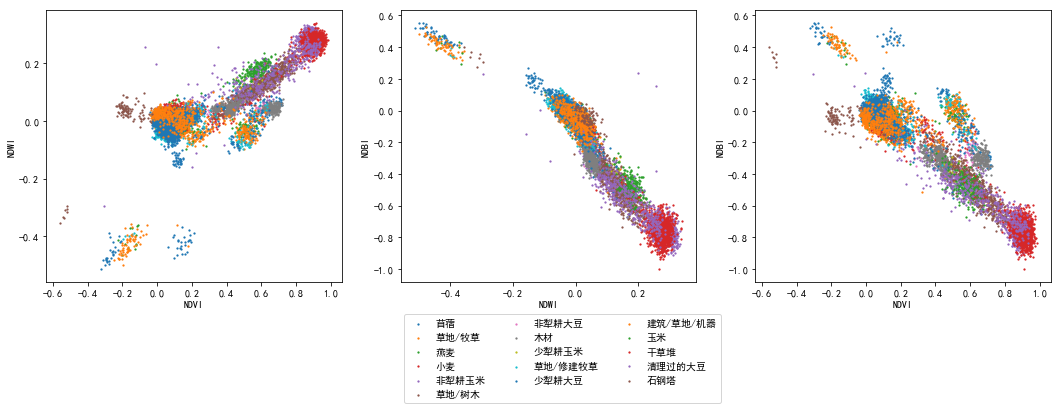

In [44]:
# NDVI,NDWI,NDBI可视化
NDVI = (train_feature[:,62]-train_feature[:,31])/(train_feature[:,62]+train_feature[:,31])
NDWI = (train_feature[:,62]-train_feature[:,100])/(train_feature[:,62]+train_feature[:,100])
NDBI = (train_feature[:,150]-train_feature[:,62])/(train_feature[:,150]+train_feature[:,62])
cm_spectral = ListedColormap(colorize/255, name='HSI')
fig,ax = plt.subplots(1,3,figsize=(18,5))
for i in range(class_num):
    idx = np.where(np.array(train_label)==i+1)[0]
    ax[0].scatter(NDVI[idx],NDWI[idx],s=1.5)
    ax[1].scatter(NDWI[idx],NDBI[idx],s=1.5)
    ax[2].scatter(NDVI[idx],NDBI[idx],s=1.5)
ax[0].set_xlabel('NDVI')
ax[0].set_ylabel('NDWI')
ax[1].set_xlabel('NDWI')
ax[1].set_ylabel('NDBI')
ax[2].set_xlabel('NDVI')
ax[2].set_ylabel('NDBI')
plt.legend(['苜蓿','草地/牧草','燕麦','小麦','非犁耕玉米',
               '草地/树木','非犁耕大豆','木材','少犁耕玉米',
               '草地/修建牧草','少犁耕大豆','建筑/草地/机器',
               '玉米','干草堆','清理过的大豆','石钢塔'],bbox_to_anchor=(-0.1, -0.1),ncol=3)

In [29]:
import datetime
import json
# algorithm = ['ball_tree','kd_tree','brute']
algorithm = ['ball_tree','kd_tree']
f = open('time.txt','w')
record = []
for i in range(10,16):
    x = train_feature[:,:10*i+1]
    y = train_label
    for a in algorithm:
        t1 = datetime.datetime.now()
        knn = KNeighborsClassifier(n_neighbors=50,algorithm=a)
        knn.fit(x,y)
        score = knn.score(test_feature[:,:10*i+1],test_label)
        t2 = datetime.datetime.now()
        print('%d features score %f, consuming %d seconds'%(10*i+1,score,(t2-t1).seconds))
        record.append([score,(t2-t1).seconds])
f.write(json.dumps(record))
f.close()

101 features score 0.707972, consuming 64 seconds
101 features score 0.707972, consuming 59 seconds
111 features score 0.711094, consuming 107 seconds
111 features score 0.711094, consuming 100 seconds
121 features score 0.716167, consuming 117 seconds
121 features score 0.716167, consuming 117 seconds
131 features score 0.726607, consuming 129 seconds
131 features score 0.726607, consuming 126 seconds
141 features score 0.727486, consuming 144 seconds
141 features score 0.727486, consuming 137 seconds
151 features score 0.729339, consuming 162 seconds
151 features score 0.729339, consuming 166 seconds


In [45]:
"""可视化全特征预测结果"""
knn = KNeighborsClassifier(n_neighbors=50,algorithm='brute')
ind_no0 = np.where(np.array(train_label)!=0)
knn.fit(np.array(train_feature)[ind_no0],np.array(train_label)[ind_no0])
ind_no0_test = np.where(np.array(test_label)!=0)
print(knn.score(np.array(test_feature)[ind_no0_test],np.array(test_label)[ind_no0_test]))
pred = knn.predict(feature)
pred_map = pred.reshape((img.shape[0],-1))

ims = colorize[pred_map-1,:].reshape([img.shape[0],img.shape[1],-1])
plt.figure()
plt.imshow(ims)
plt.xticks([])
plt.yticks([])
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

KeyboardInterrupt: 

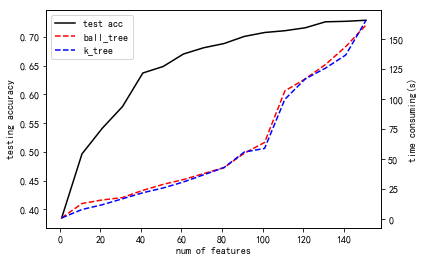

In [37]:
"""分析分类精度与特征数的关系，同时比较不同的算法之间的计算效率"""
with open('time.txt','r') as f:
    record = f.read()
record = np.array(json.loads(record))
acc = record[::2,0]
time_balltree = record[::2,1]
time_ktree = record[1::2,1]
x = range(1,152,10)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ln1 = ax1.plot(x, acc,'k-',label = 'test acc')
ax1.set_ylabel('testing accuracy')
ax1.set_xlabel('num of features')
ax2 = ax1.twinx()
ln2 = ax2.plot(x,time_balltree,'r--',label='ball_tree')
ln3 = ax2.plot(x,time_ktree,'b--',label = 'k_tree')
ax2.set_ylabel('time consuming(s)')
# 合并图例
lns = ln1+ln2+ln3
labels = [ln.get_label() for ln in lns]
ax1.legend(lns,labels,loc=0)